In [1]:
#import axion_ppa
import priors
import ppa
from ppa import svd_inv
import numpy as np
import matplotlib.pyplot as plt
import json
import numpy.linalg as nl
import scipy.linalg as sl
import mpmath
mpmath.mp.dps=30
print(mpmath.mp)

import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import scipy.constants as sc
from astropy.time import Time
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6



PSR_DICT= ppa.Load_Pulsars()
PSR_NAME_LIST = list(PSR_DICT.keys())

Mpmath settings:
  mp.prec = 103               [default: 53]
  mp.dps = 30                 [default: 15]
  mp.trap_complex = False     [default: False]


In [13]:
pulsars = [ppa.Pulsar(PSR_DICT[psrn]) for psrn in PSR_DICT][2:5]
array = ppa.Array(pulsars)
test1 = array.Gen_White_Mock_Data()


# Mock

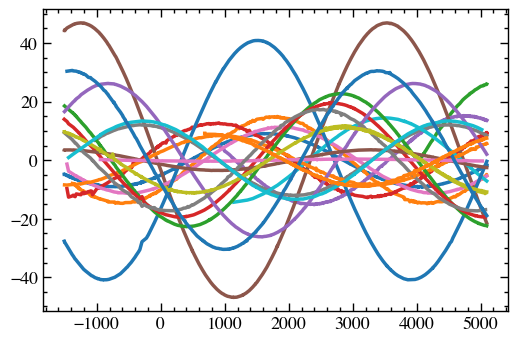

In [3]:
test2 = array.Gen_Red_Mock_Data("auto" , -23.0 , 1,seed=None)
for i in range(22):
    plt.plot(array.TOA[i][0],test2[i][0])

In [5]:
pulsars = [ppa.Pulsar(PSR_DICT[psrn]) for psrn in PSR_DICT][:]
array = ppa.Array(pulsars)
ma = 1e-23
Phi_blocks = array.Get_Sigma(1e-3,ma,np.ones(len(pulsars)))
Phi = np.array(np.block( Phi_blocks.tolist() ) )
F,F_by_SS = array.Get_F(ma)
#self=array
Sigma = F.T @ Phi @ F

pointer = np.concatenate([[0],np.cumsum(np.concatenate(array.NOBS))])


In [6]:
_Phi = array.Get_Sigma( 1e-3 , ma ,np.ones(len(pulsars)) )
_Phi_Full = np.block( _Phi.tolist() )  
_Phi_Auto = np.diag( np.diag(_Phi_Full) )

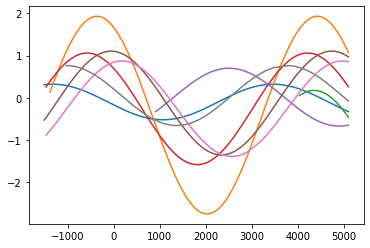

In [7]:
mock = np.random.multivariate_normal(np.zeros(len(_Phi_Full)),_Phi_Full)
divmock = [(mock@F)[ pointer[i] : pointer[i+1] ] for i in range(8)]
for i in range(8):
    plt.plot( array.TOA[i][0] , divmock[i]-divmock[i].mean() )